<a href="https://colab.research.google.com/github/BondaiKa/Car-Model-Classification/blob/master/MainWorker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import pandas as pd
from datetime import datetime
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import time
import numpy as np
import os 
%matplotlib inline
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [100]:
print(tf.config.list_physical_devices("GPU"))
print(tf.config.list_logical_devices("CPU"))

[]
[LogicalDevice(name='/device:CPU:0', device_type='CPU')]


In [101]:
DATASET_DIR = "./GRZ_and_model_recognition/learn/"
NUM_CLASSES = 11

In [102]:
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
data_dir = os.listdir('./GRZ_and_model_recognition/learn/')
data_dir

['TOYOTA_RÇV4_B',
 'VOLVO_ALLVOLVO_C',
 'ìôUNDÇI_SÄLÇRIS_B',
 'RàNÇULÆ_DUSÆàR_B',
 'VÄLèSWÇGàN_ÉÄLÄ_B',
 'LADA_PRIORA_B',
 'MAZDA_3_B',
 'VÄLèSWÇGàN_TIGUAN_B',
 'KAMAZ_ALLKAMAZ_C',
 'èIÇ_RIÄ_B',
 'SCANIA_ALLSCANIA_C']

In [103]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATASET_DIR,
  validation_split=0.2,
  subset="training",
  seed=123
)

Found 156370 files belonging to 11 classes.
Using 125096 files for training.


In [104]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  DATASET_DIR,
  validation_split=0.2,
  subset="validation",
  seed=123,
)

Found 156370 files belonging to 11 classes.
Using 31274 files for validation.


In [105]:
class_names = train_ds.class_names
class_names

['KAMAZ_ALLKAMAZ_C',
 'LADA_PRIORA_B',
 'MAZDA_3_B',
 'RàNÇULÆ_DUSÆàR_B',
 'SCANIA_ALLSCANIA_C',
 'TOYOTA_RÇV4_B',
 'VOLVO_ALLVOLVO_C',
 'VÄLèSWÇGàN_TIGUAN_B',
 'VÄLèSWÇGàN_ÉÄLÄ_B',
 'èIÇ_RIÄ_B',
 'ìôUNDÇI_SÄLÇRIS_B']

(256, 256, 3)


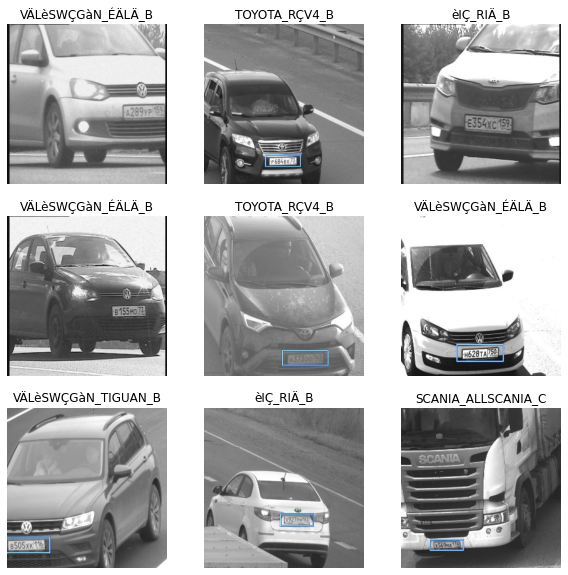

In [106]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    print(images[0].shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [107]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [112]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Create a callback that saves the model's weights
checkpoint_path = "models/training_{epoch:02d}_{val_acc:.2f}/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
])


In [113]:
model.compile(
    optimizer='SGD',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [116]:
with tf.device('/cpu:0'):
    model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    callbacks=[tensorboard_callback, cp_callback],
    batch_size = 1000
)

Epoch 1/5
3910/3910 [==============================] - ETA: 0s - loss: 1.5758 - accuracy: 0.4363

KeyError: 'Failed to format this callback filepath: "models/training_{epoch:02d}_{val_acc:.2f}/cp.ckpt". Reason: \'val_acc\''

In [98]:
%tensorboard --logdir logs/scalars

Reusing TensorBoard on port 6006 (pid 41558), started 0:00:14 ago. (Use '!kill 41558' to kill it.)

In [ ]:
# checkpoint_path = "models/training_{epoch:02d}_{val_acc:.2f}/cp.ckpt"

# model.save_weights(checkpoint_path.format(epoch=0))

In [59]:
model.load_weights('training_1/cp.ckpt')

In [62]:
final_test_path = "/home/karim/src/Car-Model-Classification/new_data/"

In [63]:
test_final = tf.data.Dataset.list_files(final_test_path+'/*.jpg') 

In [91]:
# test_image = tf.keras.preprocessing.image.load_img(final_test_path+'/rav_4.jpg')
# test_image = tf.keras.preprocessing.image.img_to_array(test_image)
# input_shape = test_image.shape
# test_image = np.expand_dims(test_image, axis=0)
# test_image.shape
# test_image = tf.keras.preprocessing.image.load_img(
#     final_test_path+'/rav_4.jpg',  color_mode='grayscale', target_size=(256, 256, 3),
#     interpolation='nearest'
# )

In [95]:
model.predict(val_ds)


KeyboardInterrupt: 